In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


Encoder Credit_Score

In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df["Credit_Label"] = encode.fit_transform(df["Credit_Score"])
Credit_Labels = encode.classes_

In [6]:
import tensorflow 

In [7]:
print(len(Credit_Labels))
print(Credit_Labels)

3
['Good' 'Poor' 'Standard']


In [8]:
print(df["Credit_Label"])

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Label, Length: 100000, dtype: int32


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [10]:
df.drop("Credit_Score", axis=1, inplace=True)

In [11]:
x = df.drop("Credit_Label", axis=1)
y = df["Credit_Label"]

In [12]:
x

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Label, Length: 100000, dtype: int32

In [14]:
object_columns = x.select_dtypes("object").columns.to_list()

In [15]:
print(len(object_columns))
print(object_columns)

6
['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [16]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=object_columns, return_df=True)
encoder.fit(x)

MemoryError: Unable to allocate 7.55 GiB for an array with shape (10128, 100000) and data type int64

In [ ]:
x = encoder.transform(x)

In [ ]:
x

,ID,Customer_ID,Month,Name_0,Name_1,Name_2,Name_3,Name_4,Age,SSN,...,Num_Credit_Inquiries,Credit_Mix_0,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount_0,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_0,Monthly_Balance
0,5634,3392,1,0,0,0,0,1,23.0,821000265.0,...,4.0,1,809.98,26.822620,265.0,1,49.574949,21.465380,1,312.494089
1,5635,3392,2,0,0,0,0,1,23.0,821000265.0,...,4.0,1,809.98,31.944960,266.0,1,49.574949,21.465380,2,284.629162
2,5636,3392,3,0,0,0,0,1,23.0,821000265.0,...,4.0,1,809.98,28.609352,267.0,1,49.574949,21.465380,3,331.209863
3,5637,3392,4,0,0,0,0,1,23.0,821000265.0,...,4.0,1,809.98,31.377862,268.0,1,49.574949,21.465380,4,223.451310
4,5638,3392,5,0,0,0,0,1,23.0,821000265.0,...,4.0,1,809.98,24.797347,269.0,1,49.574949,21.465380,5,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,1,0,1,2,8,25.0,78735990.0,...,3.0,1,502.38,34.663572,378.0,1,35.104023,24.028477,6,479.866228
99996,155626,37932,5,1,0,1,2,8,25.0,78735990.0,...,3.0,1,502.38,40.565631,379.0,1,35.104023,24.028477,5,496.651610
99997,155627,37932,6,1,0,1,2,8,25.0,78735990.0,...,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,6,516.809083
99998,155628,37932,7,1,0,1,2,8,25.0,78735990.0,...,3.0,1,502.38,33.638208,381.0,1,35.104023,24.028477,2,319.164979


Standardized Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [ ]:
x

array([[-1.73199308, -1.57530852, -1.52752523, ..., -0.8623109 ,
        -1.80533189, -0.39773279],
       [-1.73196998, -1.57530852, -1.09108945, ..., -0.8623109 ,
        -1.15589688, -0.53591622],
       [-1.73194689, -1.57530852, -0.65465367, ..., -0.8623109 ,
        -0.50646188, -0.30492041],
       ...,
       [ 1.73194689,  0.83325946,  0.65465367, ..., -0.79660181,
         1.44184312,  0.61547456],
       [ 1.73196998,  0.83325946,  1.09108945, ..., -0.79660181,
        -1.15589688, -0.36465154],
       [ 1.73199308,  0.83325946,  1.52752523, ..., -0.79660181,
         0.79240812,  0.00484057]])

In [ ]:
x.shape, y.shape

((100000, 36), (100000,))

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# x_pca = pca.fit_transform(x)

In [ ]:
# x_pca.shape, y.shape

((100000, 20), (100000,))

Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val_tes, y_train, y_val_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_val_tes, y_val_test, test_size=0.5, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(80000, 20) (80000,)
(10000, 20) (10000,)
(10000, 20) (10000,)


In [ ]:
from collections import Counter

num_class_counter = Counter(y_train)

num_class = dict(num_class_counter)
class_weight = {}
total = len(y_train)
for i in num_class.keys():
    class_weight[i] = total/(15.0*num_class[i])

Training Deep Neural Network Model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
model = Sequential()
# Input
model.add(Dense(512, activation="relu", input_dim = x_train.shape[1]))
model.add(Dropout(0.1))
# Layers
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
# Output
model.add(Dense(3, activation="softmax"))

# Compile Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5) 
# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 0.00001, mode = 'min', verbose = 2)


Fit Model

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 256, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.1563 - accuracy: 0.6088 - val_loss: 0.7690 - val_accuracy: 0.6368
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.1480 - accuracy: 0.6262 - val_loss: 0.7866 - val_accuracy: 0.6291
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.1452 - accuracy: 0.6298 - val_loss: 0.7459 - val_accuracy: 0.6512
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.1433 - accuracy: 0.6331 - val_loss: 0.7485 - val_accuracy: 0.6459
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.1406 - accuracy: 0.6384 - val_loss: 0.7289 - val_accuracy: 0.6536
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.1384 - accuracy: 0.6406 - val_loss: 0.7313 - val_accuracy: 0.6460
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.1357 - accuracy: 0.6459 - val_loss: 0.7172 - val_accuracy

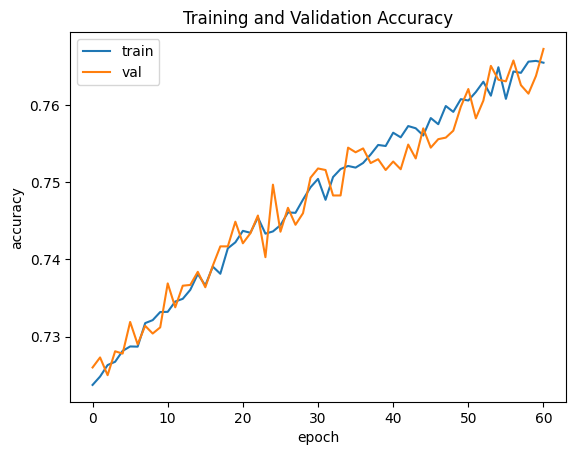

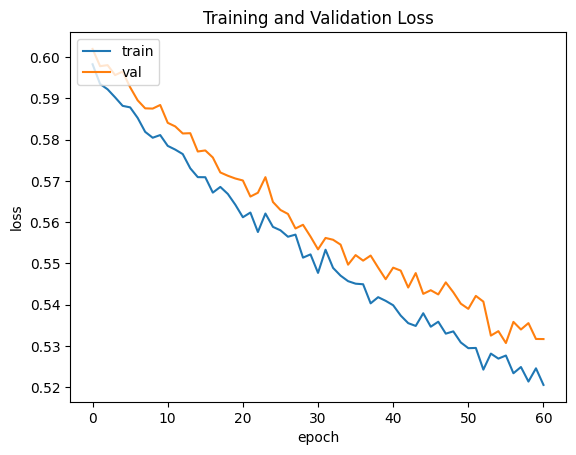

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Đánh giá Model trên toàn bộ tập test

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5451 - accuracy: 0.7632


In [ ]:
import random as rd
m = rd.randint(0, x_test.shape[0])
X_new = x_test[m]
Y_new = y_test.iloc[m]
# print(type(X_new))
# print(type(Y_new))
X_new = np.expand_dims(X_new, axis=0)
Y_predict = model.predict(X_new)
# print(Y_predict)
CerditScore_label_digital = np.argmax(Y_predict)
print("Giá trị dự đoán: ", CerditScore_label_digital)
print("Giá Trị thực tế: ", Y_new)
print("Credit_Score: ", Credit_Labels[CerditScore_label_digital])

1/1 [==============================] - 0s 387ms/step
Giá trị dự đoán:  2
Giá Trị thực tế:  2
Credit_Score:  Standard
